In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
# from matplotlib.font_manager import FontProperties
import matplotlib
import matplotlib.dates as mdates
from datetime import timedelta
from dateutil.relativedelta import relativedelta

In [2]:
# font_path = 'System/Library/Fonts/Supplemental/Songti.ttc'
# prop = FontProperties(fname=font_path)

In [3]:
matplotlib.rcParams['font.family'] = 'Heiti TC'

In [17]:
file_name = 'TF_2.2.0.csv'

In [18]:
df = pd.read_csv(file_name, parse_dates=['Birthday', 'First_Appear', 'Debut', 'Leave'])


date_columns = ['Birthday', 'First_Appear', 'Debut', 'Leave']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='%Y.%m.%d', errors='coerce')

# Dropping rows where 'Birthday' is NaN
df = df.dropna(subset=['Birthday'])

# Sorting the DataFrame by Birthday
# df = df.sort_values(by='Birthday')
df = df.sort_values(by='First_Appear')

# Getting today's date for plotting purposes
today = datetime.today()

/var/folders/xz/_qfvtyt57gng46nhd35csfz00000gn/T/ipykernel_10199/3869284479.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_name, parse_dates=['Birthday', 'First_Appear', 'Debut', 'Leave'])
/var/folders/xz/_qfvtyt57gng46nhd35csfz00000gn/T/ipykernel_10199/3869284479.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_name, parse_dates=['Birthday', 'First_Appear', 'Debut', 'Leave'])


In [19]:
start_date = '1998-01-01'
end_date = pd.Timestamp.now().strftime('%Y-%m-%d')
dates = pd.date_range(start=start_date, end=end_date, freq='D')

In [20]:
df

,Name,Birthday,First_Appear,Debut,Leave,Generation
42,伍禾胤,1998-07-17,2010-07-01,NaT,2012-02-01,1
44,朱志仁,1998-01-28,2010-07-01,NaT,2012-01-01,1
45,丁玺龙,1998-11-12,2010-07-01,NaT,2012-02-01,1
46,管浩圻,1999-06-26,2010-07-01,NaT,2011-12-01,1
47,欧阳田戈,1998-03-14,2010-07-01,NaT,2012-03-01,1
...,...,...,...,...,...,...
32,杨博文,2010-06-01,2023-01-26,NaT,NaT,4
38,智恩涵,2013-09-24,2023-01-26,NaT,NaT,4
34,张奕然,2010-09-13,2023-03-06,NaT,NaT,4
40,陈奕恒,2010-05-09,2023-08-15,NaT,NaT,4


In [21]:
def alternating_background(ax, y_labels, color1='lightgrey', color2='white'):
    for i, label in enumerate(y_labels):
        if i % 2 == 0:
            ax.axhspan(i - 0.5, i + 0.5, facecolor=color1, edgecolor='none', zorder=-1)
        else:
            ax.axhspan(i - 0.5, i + 0.5, facecolor=color2, edgecolor='none', zorder=-1)

In [22]:
generation_colors = {
    1: '#FFDDC1',
    2: '#C1FFD7',
    3: '#D1C1FF',
    4: '#E37A80',
}

# sort by age

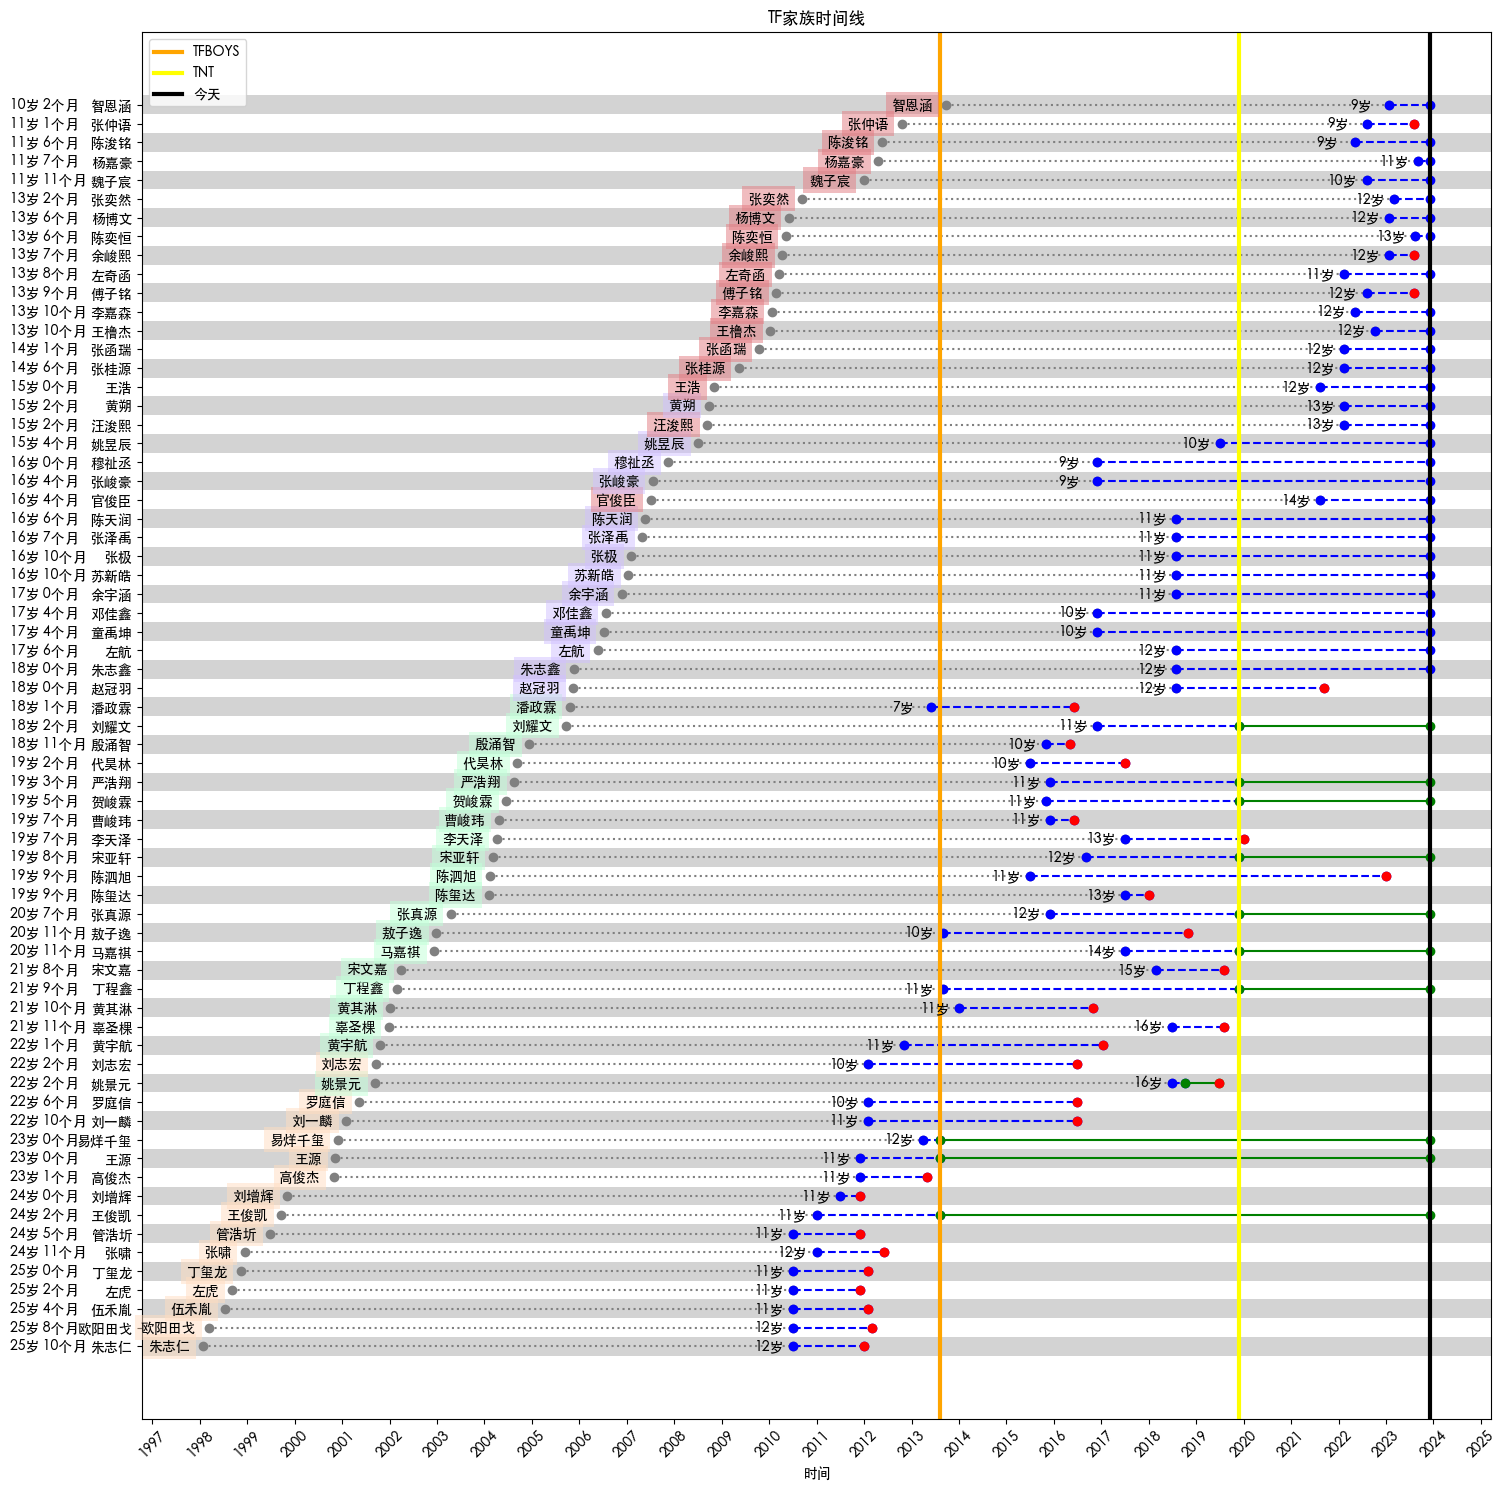

In [27]:
df = df.sort_values(by='Birthday')

plt.figure(figsize=(15, 15))
ax = plt.gca()

# Adding alternating background colors
alternating_background(ax, df['Name'])

start_date = pd.Timestamp('1998-01-01')

for _, row in df.iterrows():
    # Plotting from Birthday to First_Appear (Gray Dotted Line)
    plt.plot([row['Birthday'], row['First_Appear']], [row['Name'], row['Name']], linestyle=':', color='grey', marker='o')

    debuted = pd.notna(row['Debut'])
    left = pd.notna(row['Leave'])
    
    if not debuted and left:
        plt.plot([row['First_Appear'], row['Leave']], [row['Name'], row['Name']], linestyle='--', color='blue', marker='o')
        plt.plot(row['Leave'], [row['Name']], marker='o', color='red') #markersize=5
    if not debuted and not left:
        plt.plot([row['First_Appear'], today], [row['Name'], row['Name']], linestyle='--', color='blue', marker='o')
    if debuted and left:
        plt.plot([row['First_Appear'], row['Debut']], [row['Name'], row['Name']], linestyle='--', color='blue', marker='o')
        plt.plot([row['Debut'], row['Leave']], [row['Name'], row['Name']], linestyle='-', color='green', marker='o')
        plt.plot(row['Leave'], [row['Name']], marker='o', color='red') #markersize=5
    if debuted and not left:
        plt.plot([row['First_Appear'], row['Debut']], [row['Name'], row['Name']], linestyle='--', color='blue', marker='o')
        plt.plot([row['Debut'], today], [row['Name'], row['Name']], linestyle='-', color='green', marker='o')
    
    gen_color = generation_colors.get(row['Generation'], 'white')  # Default to white if generation not found
    ax.text(row['Birthday'] - timedelta(days=100) , row['Name'], row['Name'], 
            horizontalalignment='right', 
            verticalalignment='center', 
            bbox=dict(facecolor=gen_color, edgecolor='none', alpha=0.5))
    
    age_delta = relativedelta(row['First_Appear'], row['Birthday'])
    age_years_months = f"{age_delta.years}岁"
    ax.text(row['First_Appear'] - timedelta(days=300), row['Name'],age_years_months,verticalalignment='center')

    age_delta = relativedelta(today, row['Birthday'])
    age_years_months = f"{age_delta.years}岁 {age_delta.months}个月"
    ax.text(pd.Timestamp('1994-01-01'), row['Name'],age_years_months,verticalalignment='center')

# Fine-tuning the x-axis to display time in a more fine-grained manner (every 6 months)
# ax.xaxis.set_major_locator(plt.MaxNLocator(10))  # Adjust this value for different granularity
# ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m'))
ax.xaxis.set_major_locator(mdates.YearLocator(month=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

TFB = pd.Timestamp('2013-08-06')
plt.axvline(x=TFB, color='orange', label='TFBOYS', linewidth=3)

TNT = pd.Timestamp('2019-11-23')
plt.axvline(x=TNT, color='yellow', label='TNT', linewidth=3)

plt.axvline(x=today, color='black', label='今天', linewidth=3)

plt.legend()


plt.xlabel('时间')
# plt.ylabel('成员')
plt.title('TF家族时间线')
plt.tight_layout()
plt.show()


# sort by first appear

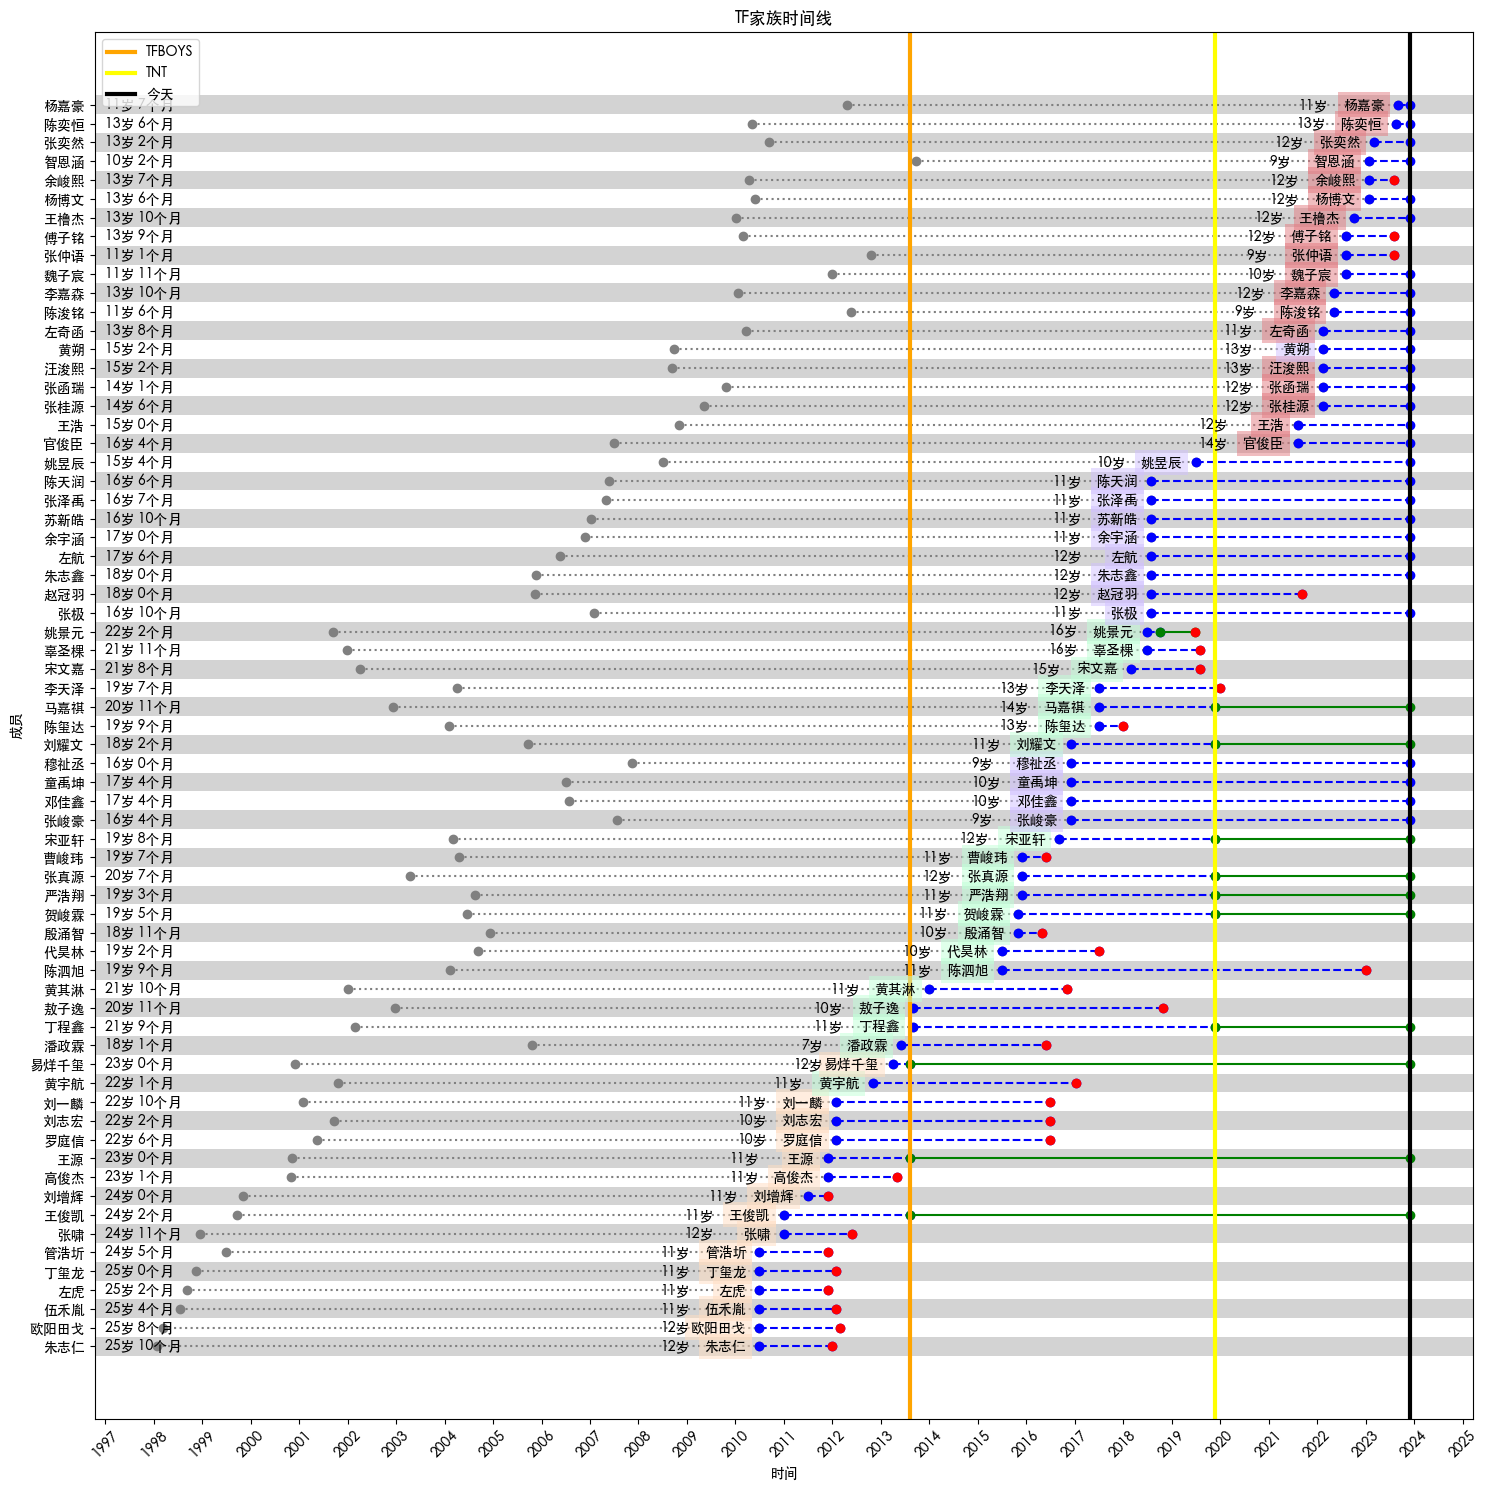

In [28]:
df = df.sort_values(by='First_Appear')

plt.figure(figsize=(15,15))
ax = plt.gca()

alternating_background(ax, df['Name'])

start_date = pd.Timestamp('1998-01-01')

for _, row in df.iterrows():
    plt.plot([row['Birthday'], row['First_Appear']], [row['Name'], row['Name']], linestyle=':', color='grey', marker='o')

    debuted = pd.notna(row['Debut'])
    left = pd.notna(row['Leave'])
    
    if not debuted and left:
        plt.plot([row['First_Appear'], row['Leave']], [row['Name'], row['Name']], linestyle='--', color='blue', marker='o')
        plt.plot(row['Leave'], [row['Name']], marker='o', color='red') #markersize=5
    if not debuted and not left:
        plt.plot([row['First_Appear'], today], [row['Name'], row['Name']], linestyle='--', color='blue', marker='o')
    if debuted and left:
        plt.plot([row['First_Appear'], row['Debut']], [row['Name'], row['Name']], linestyle='--', color='blue', marker='o')
        plt.plot([row['Debut'], row['Leave']], [row['Name'], row['Name']], linestyle='-', color='green', marker='o')
        plt.plot(row['Leave'], [row['Name']], marker='o', color='red') #markersize=5
    if debuted and not left:
        plt.plot([row['First_Appear'], row['Debut']], [row['Name'], row['Name']], linestyle='--', color='blue', marker='o')
        plt.plot([row['Debut'], today], [row['Name'], row['Name']], linestyle='-', color='green', marker='o')
    
    gen_color = generation_colors.get(row['Generation'], 'white') 
    ax.text(row['First_Appear'] - timedelta(days=100), row['Name'], row['Name'], 
            horizontalalignment='right', 
            verticalalignment='center', 
            bbox=dict(facecolor=gen_color, edgecolor='none', alpha=0.5))
    
    age_delta = relativedelta(row['First_Appear'], row['Birthday'])
    age_years_months = f"{age_delta.years}岁"
    ax.text(row['First_Appear'] - timedelta(days=750), row['Name'],age_years_months,verticalalignment='center')

    age_delta = relativedelta(today, row['Birthday'])
    age_years_months = f"{age_delta.years}岁 {age_delta.months}个月"
    ax.text(pd.Timestamp('1997-01-01'), row['Name'],age_years_months,verticalalignment='center')
    
#     plt.annotate(age_years_months, (row['First_Appear']- timedelta(days=5000), row['Name']))  

# Fine-tuning the x-axis to display time in a more fine-grained manner (every 6 months)
# ax.xaxis.set_major_locator(plt.MaxNLocator(10))  # Adjust this value for different granularity
# ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m'))
ax.xaxis.set_major_locator(mdates.YearLocator(month=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

TFB = pd.Timestamp('2013-08-06')
plt.axvline(x=TFB, color='orange', label='TFBOYS', linewidth=3)

TNT = pd.Timestamp('2019-11-23')
plt.axvline(x=TNT, color='yellow', label='TNT', linewidth=3)

plt.axvline(x=today, color='black', label='今天', linewidth=3)

plt.legend()


plt.xlabel('时间')
plt.ylabel('成员')
plt.title('TF家族时间线')
plt.tight_layout()
plt.show()
